# Gráficos

Apesar de o artigo informar que o modelo de propagação utilizado foi Cost231, precisamos utilizar o OkumuraHata (o mesmo que está configurado oringinalmente ao baixarmos o código no repositório do autor) para obter os resultados observados no paper.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
t2 = pd.read_csv('resultados/t2_OkumuraHata_Original', delimiter=',')
t3 = pd.read_csv('resultados/t3_OkumuraHata_Original', delimiter=',')
t2 = t2[t2.nRun.isin(t3.nRun)]
t3 = t3[t3.nRun.isin(t2.nRun)]
t2 = t2.reset_index(drop=True)
t3 = t3.reset_index(drop=True)

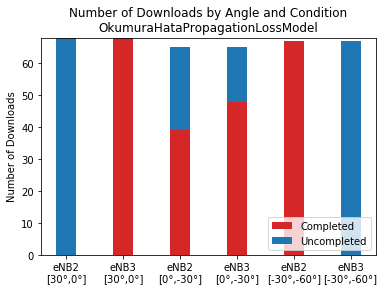

In [4]:
completed = (
    t2[(t2.angle>0) & (t2.downloadCondition=='COMPLETED')].count()[0],
    t3[(t3.angle>0) & (t3.downloadCondition=='COMPLETED')].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadCondition=='COMPLETED')].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadCondition=='COMPLETED')].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadCondition=='COMPLETED')].count()[0],
    t3[(-30>t3.angle) & (t3.downloadCondition=='COMPLETED')].count()[0],
)

uncompleted = (
    t2[(t2.angle>0) & (t2.downloadCondition=='UNCOMPLETED')].count()[0],
    t3[(t3.angle>0) & (t3.downloadCondition=='UNCOMPLETED')].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadCondition=='UNCOMPLETED')].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadCondition=='UNCOMPLETED')].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadCondition=='UNCOMPLETED')].count()[0],
    t3[(-30>t3.angle) & (t3.downloadCondition=='UNCOMPLETED')].count()[0],
)

N = 6                 # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, completed, width, color='#d62728', align='center')
p2 = plt.bar(ind, uncompleted, width, bottom=completed, align='center')

plt.ylabel('Number of Downloads')
plt.title('Number of Downloads by Angle and Condition\nOkumuraHataPropagationLossModel')
plt.xticks(ind, ('eNB2\n[30°,0°]', 'eNB3\n[30°,0°]', 'eNB2\n[0°,-30°]', 'eNB3\n[0°,-30°]', 'eNB2\n[-30°,-60°]','eNB3\n[-30°,-60°]'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Completed', 'Uncompleted'), loc=4)

plt.show()

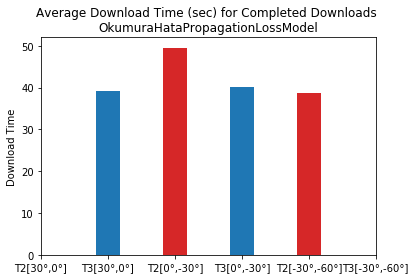

In [5]:
time_t2 = (
    t2.loc[(t2.angle>0) & (t2['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t2.loc[(-30<t2.angle) & (t2.angle<0) & (t2['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t2.loc[(-30>t2.angle) & (t2['downloadCondition']=='COMPLETED'), 'downloadTime'].mean()
)
time_t3 = (
    t3.loc[(t3.angle>0) & (t3['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t3.loc[(-30<t3.angle) & (t3.angle<0) & (t3['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t3.loc[(-30>t2.angle) & (t3['downloadCondition']=='COMPLETED'), 'downloadTime'].mean()
)

N = 6                 # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind[::2], time_t2, width, color='#d62728', align='center')
p2 = plt.bar(ind[1::2], time_t3, width, align='center')

plt.ylabel('Download Time')
plt.title('Average Download Time (sec) for Completed Downloads \nOkumuraHataPropagationLossModel')
plt.xticks(ind, ('T2[30°,0°]', 'T3[30°,0°]', 'T2[0°,-30°]', 'T3[0°,-30°]', 'T2[-30°,-60°]', 'T3[-30°,-60°]'))
#plt.legend((p1[0], p2[0]), ('Completed', 'Uncompleted'), loc=4)

plt.show()

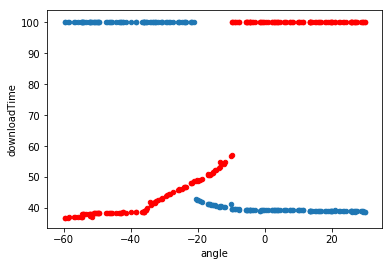

In [6]:
ax = t2.plot(kind='scatter', x='angle', y='downloadTime', color='red')
t3.plot(kind='scatter', x='angle', y='downloadTime', ax=ax)
plt.show()

In [7]:
t2 = pd.read_csv('resultados/t2_Cost231_Original', delimiter=',')
t3 = pd.read_csv('resultados/t3_Cost231_Original', delimiter=',')
t2 = t2[t2.nRun.isin(t3.nRun)]
t3 = t3[t3.nRun.isin(t2.nRun)]
t2 = t2.reset_index(drop=True)
t3 = t3.reset_index(drop=True)

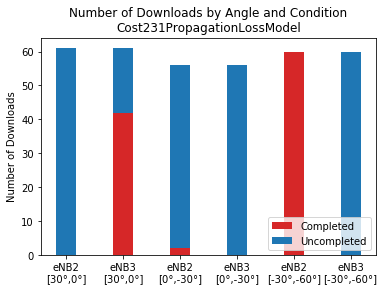

In [8]:
completed = (
    t2[(t2.angle>0) & (t2.downloadCondition=='COMPLETED')].count()[0],
    t3[(t3.angle>0) & (t3.downloadCondition=='COMPLETED')].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadCondition=='COMPLETED')].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadCondition=='COMPLETED')].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadCondition=='COMPLETED')].count()[0],
    t3[(-30>t3.angle) & (t3.downloadCondition=='COMPLETED')].count()[0],
)

uncompleted = (
    t2[(t2.angle>0) & (t2.downloadCondition=='UNCOMPLETED')].count()[0],
    t3[(t3.angle>0) & (t3.downloadCondition=='UNCOMPLETED')].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadCondition=='UNCOMPLETED')].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadCondition=='UNCOMPLETED')].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadCondition=='UNCOMPLETED')].count()[0],
    t3[(-30>t3.angle) & (t3.downloadCondition=='UNCOMPLETED')].count()[0],
)

N = 6                 # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, completed, width, color='#d62728', align='center')
p2 = plt.bar(ind, uncompleted, width, bottom=completed, align='center')

plt.ylabel('Number of Downloads')
plt.title('Number of Downloads by Angle and Condition\nCost231PropagationLossModel')
plt.xticks(ind, ('eNB2\n[30°,0°]', 'eNB3\n[30°,0°]', 'eNB2\n[0°,-30°]', 'eNB3\n[0°,-30°]', 'eNB2\n[-30°,-60°]','eNB3\n[-30°,-60°]'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Completed', 'Uncompleted'), loc=4)

plt.show()

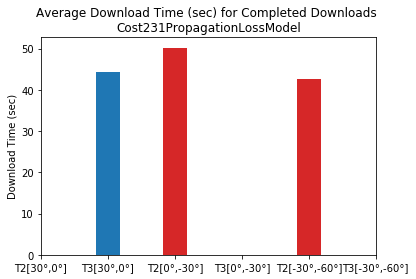

In [9]:
time_t2 = (
    t2.loc[(t2.angle>0) & (t2['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t2.loc[(-30<t2.angle) & (t2.angle<0) & (t2['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t2.loc[(-30>t2.angle) & (t2['downloadCondition']=='COMPLETED'), 'downloadTime'].mean()
)
time_t3 = (
    t3.loc[(t3.angle>0) & (t3['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t3.loc[(-30<t3.angle) & (t3.angle<0) & (t3['downloadCondition']=='COMPLETED'), 'downloadTime'].mean(),
    t3.loc[(-30>t2.angle) & (t3['downloadCondition']=='COMPLETED'), 'downloadTime'].mean()
)

N = 6                 # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind[::2], time_t2, width, color='#d62728', align='center')
p2 = plt.bar(ind[1::2], time_t3, width, align='center')

plt.ylabel('Download Time (sec)')
plt.title('Average Download Time (sec) for Completed Downloads \nCost231PropagationLossModel')
plt.xticks(ind, ('T2[30°,0°]', 'T3[30°,0°]', 'T2[0°,-30°]', 'T3[0°,-30°]', 'T2[-30°,-60°]', 'T3[-30°,-60°]'))
#plt.legend((p1[0], p2[0]), ('Completed', 'Uncompleted'), loc=4)

plt.show()

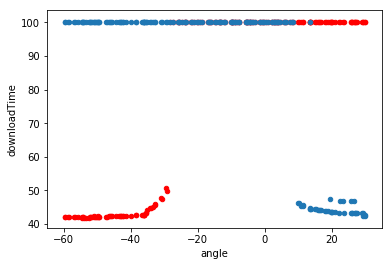

In [10]:
ax = t2.plot(kind='scatter', x='angle', y='downloadTime', color='red')
t3.plot(kind='scatter', x='angle', y='downloadTime', ax=ax)
plt.show()

In [2]:
t2 = pd.read_csv('resultados/t2_OkumuraHata_Modificado', delimiter='\t')
t3 = pd.read_csv('resultados/t3_OkumuraHata_Modificado', delimiter='\t')
t2 = t2[t2.nRun.isin(t3.nRun)]
t3 = t3[t3.nRun.isin(t2.nRun)]
t2 = t2.reset_index(drop=True)
t3 = t3.reset_index(drop=True)

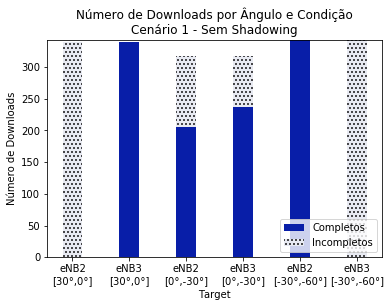

In [10]:
completed = (
    t2[(t2.angle>0) & (t2.downloadTime!=100.0)].count()[0],
    t3[(t3.angle>0) & (t3.downloadTime!=100.0)].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadTime!=100.0)].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadTime!=100.0)].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadTime!=100.0)].count()[0],
    t3[(-30>t3.angle) & (t3.downloadTime!=100.0)].count()[0],
)

uncompleted = (
    t2[(t2.angle>0) & (t2.downloadTime==100.0)].count()[0],
    t3[(t3.angle>0) & (t3.downloadTime==100.0)].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadTime==100.0)].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadTime==100.0)].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadTime==100.0)].count()[0],
    t3[(-30>t3.angle) & (t3.downloadTime==100.0)].count()[0],
)

N = 6                 # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, completed, width, color='#081EA8', align='center')
p2 = plt.bar(ind, uncompleted, width, color='#E8EAF2', bottom=completed, align='center', hatch="...")

plt.ylabel('Número de Downloads')
plt.xlabel('Target')

plt.title('Número de Downloads por Ângulo e Condição\nCenário 1 - Sem Shadowing')
plt.xticks(ind, ('eNB2\n[30°,0°]', 'eNB3\n[30°,0°]', 'eNB2\n[0°,-30°]', 'eNB3\n[0°,-30°]', 'eNB2\n[-30°,-60°]','eNB3\n[-30°,-60°]'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Completos', 'Incompletos'), loc=4)

plt.show()

In [11]:
t2 = pd.read_csv('resultados/t2_OhBuildings_ComShadowing_Modificado', delimiter='\t')
t3 = pd.read_csv('resultados/t3_OhBuildings_ComShadowing_Modificado', delimiter='\t')
t2 = t2[t2.nRun.isin(t3.nRun)]
t3 = t3[t3.nRun.isin(t2.nRun)]
t2 = t2.reset_index(drop=True)
t3 = t3.reset_index(drop=True)

In [12]:
t2 = t2[t2.nRun.isin(t3.nRun)]
t2.reset_index(drop=True, inplace=True)
t3 = t3[t3.nRun.isin(t2.nRun)]
t3.reset_index(drop=True, inplace=True)

In [13]:
a3rsrp = pd.read_csv('resultados/A3RSRP_OhBuildings_ComShadowing_Modificado', delimiter='\t')
a2a4rsrq = pd.read_csv('resultados/A2A4RSRQ_OhBuildings_ComShadowing_Modificado', delimiter='\t')

In [14]:
t2_runs = t2.nRun
t3_runs = t3.nRun
a3rsrp_runs = a3rsrp.nRun
a2a4rsrq_runs = a2a4rsrq.nRun
valid_results = t2[t2.rsrp1==t3.rsrp1].nRun
valid_runs = set(t2_runs).intersection(t3_runs).intersection(a3rsrp_runs).intersection(a2a4rsrq_runs).intersection(valid_results)

In [15]:
t2 = t2[t2.nRun.isin(valid_runs)]
t3 = t3[t3.nRun.isin(valid_runs)]
a3rsrp = a3rsrp[a3rsrp.nRun.isin(valid_runs)]
a2a4rsrq = a2a4rsrq[a2a4rsrq.nRun.isin(valid_runs)]

t2.reset_index(drop=True, inplace=True)
t3.reset_index(drop=True, inplace=True)
a3rsrp.reset_index(drop=True, inplace=True)
a2a4rsrq.reset_index(drop=True, inplace=True)

In [16]:
t2 = t2.loc[0:999]
t3 = t3.loc[0:999]

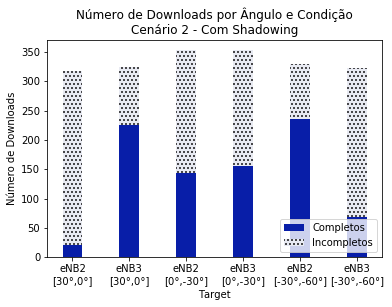

In [17]:
completed = (
    t2[(t2.angle>0) & (t2.downloadTime!=100.0)].count()[0],
    t3[(t3.angle>0) & (t3.downloadTime!=100.0)].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadTime!=100.0)].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadTime!=100.0)].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadTime!=100.0)].count()[0],
    t3[(-30>t3.angle) & (t3.downloadTime!=100.0)].count()[0],
)

uncompleted = (
    t2[(t2.angle>0) & (t2.downloadTime==100.0)].count()[0],
    t3[(t3.angle>0) & (t3.downloadTime==100.0)].count()[0],
    
    t2[(-30<t2.angle) & (t2.angle<0) & (t2.downloadTime==100.0)].count()[0],
    t3[(-30<t3.angle) & (t3.angle<0) & (t3.downloadTime==100.0)].count()[0],
    
    t2[(-30>t2.angle) & (t2.downloadTime==100.0)].count()[0],
    t3[(-30>t3.angle) & (t3.downloadTime==100.0)].count()[0],
)

N = 6                 # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, completed, width, color='#081EA8', align='center')
p2 = plt.bar(ind, uncompleted, width, color='#E8EAF2', bottom=completed, align='center', hatch="...")

plt.ylabel('Número de Downloads')
plt.xlabel('Target')

plt.title('Número de Downloads por Ângulo e Condição\nCenário 2 - Com Shadowing')
plt.xticks(ind, ('eNB2\n[30°,0°]', 'eNB3\n[30°,0°]', 'eNB2\n[0°,-30°]', 'eNB3\n[0°,-30°]', 'eNB2\n[-30°,-60°]','eNB3\n[-30°,-60°]'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Completos', 'Incompletos'), loc=4)

plt.show()